# Taller 7 Creación de CNN
Realizado por: Hinara Pastora Sánchez Mata

## 1. Preparar los datos

Primero, cargamos el dataset MNIST usando TensorFlow, se normalizan los valores de los píxeles para que estén entre 0 y 1, y se añade una dimensión adicional para manejar las imágenes como escala de grises.

* Carga del dataset: Se utiliza tf.keras.datasets.mnist.load_data() para obtener los datos de entrenamiento y prueba.
* Normalización: Los valores de los píxeles originalmente están entre 0 y 255. Se normalizan a un rango entre 0 y 1, lo que facilita el entrenamiento.
* Cambio de forma: Se añade una dimensión extra al dataset para procesar las imágenes como matrices 3D de tamaño 28x28x1 (grises).

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (valores entre 0 y 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Añadir una dimensión adicional para el canal de color (escala de grises)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

## 2. Mostrar una imagen del dataset

Para visualizar una imagen del dataset antes de entrenar la red. Esto se hace, seleccionando una imagen del conjunto de entrenamiento (x_train[0]) y se muestra usando matplotlib, junto con su etiqueta correspondiente.

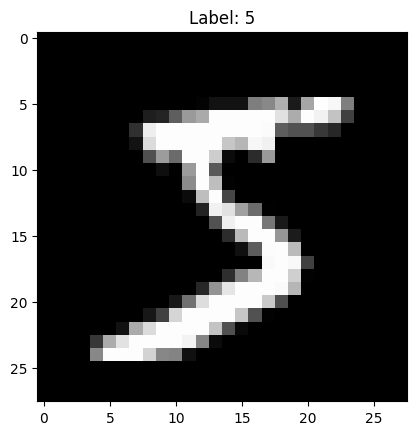

In [ ]:
# Mostrar una imagen del dataset
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

## 3. Arquitectura de la CNN

Creamos una red neuronal convolucional (CNN) personalizada para clasificar las imágenes del dataset MNIST.

La arquitectura se organiza así:
* Capa 1: Convolucional (Conv2D) con 32 filtros, un kernel de 5x5, activación ReLU, y normalización BatchNormalization para estabilizar las activaciones.
* Capa 2: MaxPooling de 2x2 para reducir las dimensiones y hacer la red más eficiente.
* Capa 3: Convolucional con 64 filtros y un kernel de 5x5, seguido de ReLU y BatchNormalization.
* Capa 4: MaxPooling para más reducción espacial.
* Capa 5: Flatten para convertir las salidas convolucionales en un vector de una dimensión.
* Capa 6: Capa densa de 128 neuronas con activación ReLU y Dropout para reducir el sobreajuste.
* Capa 7: Capa de salida con 10 neuronas y activación softmax para predecir los dígitos de 0 a 9.

In [ ]:
# Definir la arquitectura mejorada de la CNN
model = tf.keras.Sequential([
    # Primera capa convolucional
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),  # Normalización por lotes
    tf.keras.layers.MaxPooling2D((2, 2)),  # Reducción de la dimensionalidad

    # Segunda capa convolucional con más filtros
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Tercera capa convolucional
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Aplanar la salida 2D a 1D
    tf.keras.layers.Flatten(),

    # Capa completamente conectada con 128 neuronas
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Regularización mediante dropout

    # Capa de salida con 10 neuronas (una por cada clase)
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4. Compilar el modelo

Se configura el modelo con una función de pérdida, un optimizador, y una métrica de evaluación.

Se usa:
* Optimizador: Adam es un optimizador robusto y eficiente en CNN.
* Función de pérdida: sparse_categorical_crossentropy es adecuada para problemas de clasificación con etiquetas enteras (en este caso, dígitos del 0 al 9).
* Métrica: accuracy mide la precisión del modelo.


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5. Callbacks

Se implementan dos callbacks importantes para mejorar el rendimiento del modelo:

* ModelCheckpoint: Guarda el mejor modelo encontrado durante el entrenamiento, basado en el conjunto de validación.
* EarlyStopping: Detiene el entrenamiento si no hay mejoras después de 3 épocas consecutivas, lo que evita sobreajustar.

In [ ]:
# Callback para guardar el mejor modelo basado en la validación
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)

# Callback para detener el entrenamiento si no mejora después de 3 épocas
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

## 6. Entrenar el modelo y visualizar la función de pérdida y precisión

El modelo se entrena con un 10% de los datos de entrenamiento reservados para validación, y un máximo de 20 épocas. Además, se grafican la pérdida y la precisión en las épocas de entrenamiento y validación, lo que permite detectar posibles problemas de sobreajuste.


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 95s 54ms/step - accuracy: 0.9111 - loss: 0.3003 - val_accuracy: 0.9842 - val_loss: 0.0579
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9781 - loss: 0.0767 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9833 - loss: 0.0585 - val_accuracy: 0.9795 - val_loss: 0.0718
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9884 - loss: 0.0427 - val_accuracy: 0.9910 - val_loss: 0.0340
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9904 - loss: 0.0342 - val_accuracy: 0.9922 - val_loss: 0.0342
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9902 - loss: 0.0346 - val_accuracy: 0.9928 - val_loss: 0.0338
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9912 - loss: 0.0312 - val_accuracy: 0.9913 - val_loss: 0.0451
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.9908 -

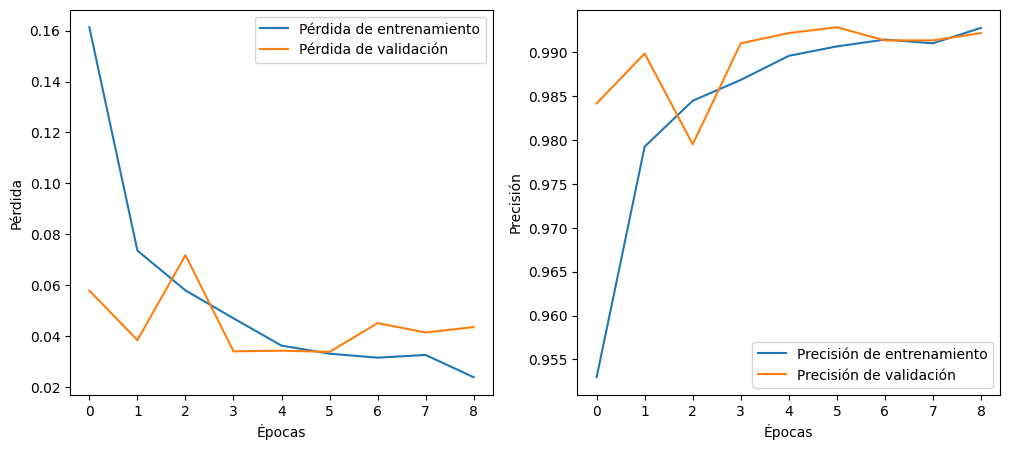

In [ ]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1,
                    callbacks=[checkpoint_cb, early_stopping_cb])

# Graficar la evolución de la función de pérdida y la precisión
plt.figure(figsize=(12, 5))

# Graficar la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

## 7. Evaluación y reporte de clasificación

Finalmente, se evalúa el modelo con los datos de prueba y se genera un reporte de clasificación. Para ello, se utiliza el conjunto de prueba para calcular la pérdida y la precisión final del modelo y mediante el classification_report se generan métricas como precisión, recall y F1-score para cada una de las clases (dígitos del 0 al 9).

313/313 - 5s - 15ms/step - accuracy: 0.9914 - loss: 0.0337

Test accuracy: 0.9914000034332275
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



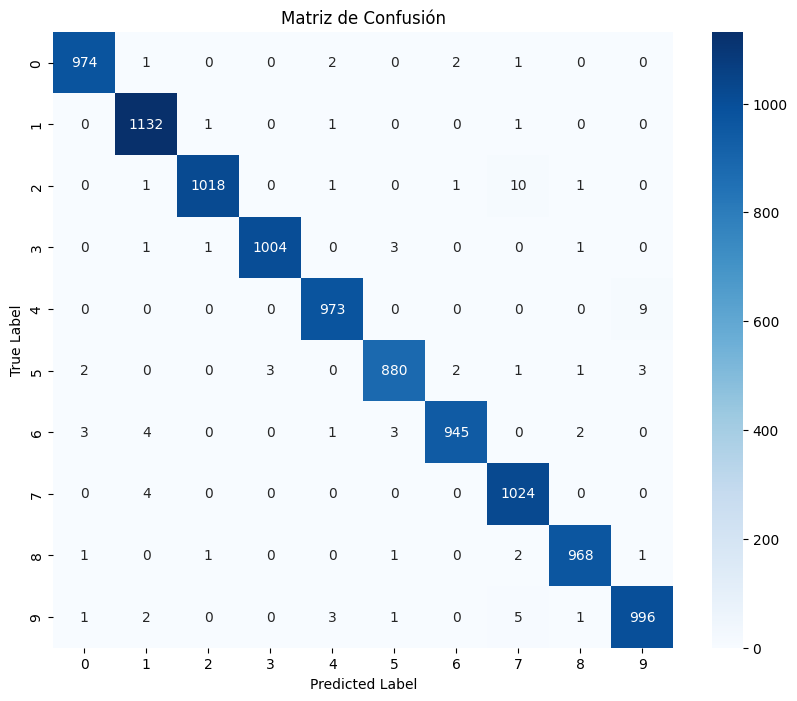

In [ ]:
import numpy as np

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Reporte de clasificación
y_pred = model.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

La matriz de confusión muestra un rendimiento excelente del modelo, con la mayoría de las predicciones correctas ubicadas en la diagonal principal, lo que indica una alta precisión en la clasificación de los dígitos del 0 al 9. Los errores son mínimos y ocurren principalmente entre clases visualmente similares, como el "5" y el "3" o el "9" y el "7". Aunque existen algunas confusiones, especialmente entre estos dígitos, el modelo predice de manera precisa la mayoría de las instancias, lo que refleja un desempeño global muy sólido.

El modelo ha mostrado un rendimiento excepcional en todas las métricas clave, con una precisión, recall y F1-score en torno al 99% para la mayoría de las clases. Esto sugiere que el modelo CNN está bien ajustado para la tarea de clasificación del dataset MNIST.